# Retail sales

In this notebook we will prepare and store the retail sales dataset found [here](https://raw.githubusercontent.com/facebook/prophet/master/examples/example_retail_sales.csv).

**Description of data:**

The timeseries is collected between January 1992 and May 2016. It consists of a single series of monthly values representing sales volumes. 

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import STL

# Get the dataset

The dataset can be obtained from this [link](https://raw.githubusercontent.com/facebook/prophet/master/examples/example_retail_sales.csv). It will open a raw file in GitHub. A simple way of obtaining the data is to copy and paste the values from your browser into a text editor of your choice. 
Save it in the Datasets directory, which is found at the root of this project, with the filename `example_retail_sales.csv`. 

Alternatively, download it using Pandas by running:



In [17]:
url = "https://raw.githubusercontent.com/facebook/prophet/master/examples/example_retail_sales.csv"
df = pd.read_csv(url)
df.to_csv("../Datasets/example_retail_sales.csv", index=False)

Now follow the rest of the notebook.

In [18]:
df = pd.read_csv(
    "../Datasets/example_retail_sales.csv",
    parse_dates=["ds"],
    index_col=["ds"],
    nrows=160,
)

# Create dataset with missing data

In [19]:
df_with_missing_data = df.copy()

In [20]:
# Insert missing data into dataframe
df_with_missing_data.iloc[10:11] = np.NaN
df_with_missing_data.iloc[25:28] = np.NaN
df_with_missing_data.iloc[40:45] = np.NaN
df_with_missing_data.iloc[70:94] = np.NaN

In [21]:
# Save dataset in Datasets directory
df_with_missing_data.to_csv("../Datasets/example_retail_sales_with_missing_data.csv")

# Create dataset with outliers

In [22]:
df_with_outliers = df.copy()

In [23]:
# Insert outliers into dataframe
outlier_idx = [20, 33, 66, 150]
df_with_outliers.iloc[outlier_idx] = df_with_outliers.iloc[outlier_idx] * 1.7

In [24]:
# Save dataset in Datasets directory
df_with_outliers.to_csv("../Datasets/example_retail_sales_with_outliers.csv")

# Create dataset with advertisement campaigns

In [25]:
# Simulate advertising campaigns

res = STL(df['y'], robust=True,).fit()

In [26]:
# add column with advertisement campaign
# originally with Nan values
df['campaign'] = np.nan

# add campaign whenever there is a sales peak
df.loc[df[res.seasonal > 30000].index, 'campaign'] = 1

# sanity check
df['campaign'].sum()

13.0

In [27]:
df['campaign'] = df['campaign'].shift(-1)

Text(0, 0.5, 'Sales')

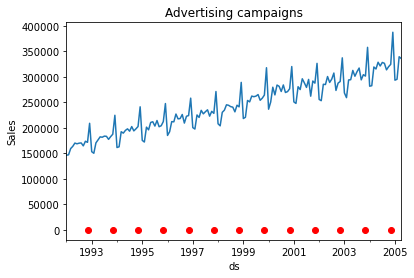

In [28]:
df['y'].plot()
df['campaign'].plot(marker='o', color='red')

plt.title('Advertising campaigns')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

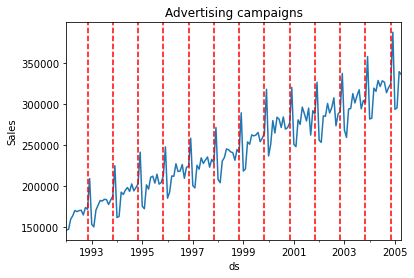

In [29]:
df['y'].plot()

for xc in df['campaign'].dropna().index:
    plt.axvline(x=xc, color='r', linestyle='--')
    
plt.title('Advertising campaigns')
plt.ylabel('Sales')

In [30]:
# Save dataset in Datasets directory

df.to_csv('../Datasets/example_retail_sales_with_campaigns.csv')